In [1]:
#data handling

In [4]:
import pandas as pd
import numpy as np

data = {
    "Energy Source": ["Solar", "Wind", "Hydropower", "Geothermal", "Biomass", "Nuclear"],
    "Energy Consumption (MWh)": [1200, np.nan, 2900, np.nan, 2500, 3200],
    "Cost (Million $)": [200, 400, np.nan, 150, 250, np.nan]
}

energy_df = pd.DataFrame(data)

energy_df.head()


,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,1200.0,200.0
1,Wind,NaN,400.0
2,Hydropower,2900.0,NaN
3,Geothermal,NaN,150.0
4,Biomass,2500.0,250.0


In [7]:
cleaned_df = energy_df.dropna()
cleaned_df.head()

,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,1200.0,200.0
4,Biomass,2500.0,250.0


# impute  missing value with the mean


In [9]:
ec_mean = energy_df["Energy Consumption (MWh)"].mean()
print("Mean of Energy Consumption (MWh)",ec_mean)
cost_mean = energy_df["Cost (Million $)"].mean()
print("Mean of Cost (Million $)",cost_mean)

Mean of Energy Consumption (MWh) 2450.0
Mean of Cost (Million $) 250.0


In [11]:
forward_fill_df = energy_df.fillna(method='ffill')
print("\nData Before Forward Filling:")
print(energy_df)
print("\nData After Forward Filling:")
forward_fill_df.head()


Data Before Forward Filling:
  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar                    1200.0             200.0
1          Wind                    2450.0             400.0
2    Hydropower                    2900.0             250.0
3    Geothermal                    2450.0             150.0
4       Biomass                    2500.0             250.0
5       Nuclear                    3200.0             250.0

Data After Forward Filling:


C:\Users\NICE\AppData\Local\Temp\ipykernel_3432\3299460206.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_fill_df = energy_df.fillna(method='ffill')


,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,1200.0,200.0
1,Wind,2450.0,400.0
2,Hydropower,2900.0,250.0
3,Geothermal,2450.0,150.0
4,Biomass,2500.0,250.0


In [12]:
# Create a flag column indicating missing values in 'Energy Consumption (MWh)'
energy_df["Missing Consumption"] = energy_df["Energy Consumption (MWh)"].isna().astype(int)
energy_df["Missing Cost"] = energy_df["Cost (Million $)"].isna().astype(int)

print("\nData with Missing Values Flagged:")
energy_df.head()


Data with Missing Values Flagged:


,Energy Source,Energy Consumption (MWh),Cost (Million $),Missing Consumption,Missing Cost
0,Solar,1200.0,200.0,0,0
1,Wind,2450.0,400.0,0,0
2,Hydropower,2900.0,250.0,0,0
3,Geothermal,2450.0,150.0,0,0
4,Biomass,2500.0,250.0,0,0


In [15]:

from sklearn.preprocessing import MinMaxScaler

energy_df = pd.DataFrame(data)

# Fill missing values with the mean
energy_df["Energy Consumption (MWh)"].fillna(energy_df["Energy Consumption (MWh)"].mean(), inplace=True)
energy_df["Cost (Million $)"].fillna(energy_df["Cost (Million $)"].mean(), inplace=True)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the columns
energy_df[["Energy Consumption (MWh)", "Cost (Million $)"]] = scaler.fit_transform(energy_df[["Energy Consumption (MWh)", "Cost (Million $)"]])

print(energy_df.head())


  Energy Source  Energy Consumption (MWh)  Cost (Million $)
0         Solar                     0.000               0.2
1          Wind                     0.625               1.0
2    Hydropower                     0.850               0.4
3    Geothermal                     0.625               0.0
4       Biomass                     0.650               0.4


C:\Users\NICE\AppData\Local\Temp\ipykernel_3432\3557138975.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_df["Energy Consumption (MWh)"].fillna(energy_df["Energy Consumption (MWh)"].mean(), inplace=True)
C:\Users\NICE\AppData\Local\Temp\ipykernel_3432\3557138975.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
energy_df[["Energy Consumption (MWh)","Cost (Million $)"]] = scaler.fit_transform(energy_df[["Energy Consumption (MWh)","Cost (Million $)"]])
print("\nData After Normalized Data (Standard Scaling):")
energy_df.head()


Data After Normalized Data (Standard Scaling):


,Energy Source,Energy Consumption (MWh),Cost (Million $)
0,Solar,-2.005893e+00,-6.546537e-01
1,Wind,3.563181e-16,1.963961e+00
2,Hydropower,7.221213e-01,1.817029e-16
3,Geothermal,3.563181e-16,-1.309307e+00
4,Biomass,8.023570e-02,1.817029e-16


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
energy_df[["Energy Consumption (MWh)"," cost (Million $)"]] = scaler.fit_transform(energy_df[["Energy Consumption (MWh)","Cost (Million $)"]])
print("\nNormalized Data:")
energy_df.head()


Normalized Data:


,Energy Source,Energy Consumption (MWh),Cost (Million $),cost (Million $)
0,Solar,0.000,-6.546537e-01,0.2
1,Wind,0.625,1.963961e+00,1.0
2,Hydropower,0.850,1.817029e-16,0.4
3,Geothermal,0.625,-1.309307e+00,0.0
4,Biomass,0.650,1.817029e-16,0.4


In [18]:
energy_encoded_df = pd.get_dummies(energy_df, columns=["Energy Source"])
print("\nData After One-Hot Encoding Categorial Variables:")
energy_encoded_df.head()


Data After One-Hot Encoding Categorial Variables:


,Energy Consumption (MWh),Cost (Million $),cost (Million $),Energy Source_Biomass,Energy Source_Geothermal,Energy Source_Hydropower,Energy Source_Nuclear,Energy Source_Solar,Energy Source_Wind
0,0.000,-6.546537e-01,0.2,False,False,False,False,True,False
1,0.625,1.963961e+00,1.0,False,False,False,False,False,True
2,0.850,1.817029e-16,0.4,False,False,True,False,False,False
3,0.625,-1.309307e+00,0.0,False,True,False,False,False,False
4,0.650,1.817029e-16,0.4,True,False,False,False,False,False


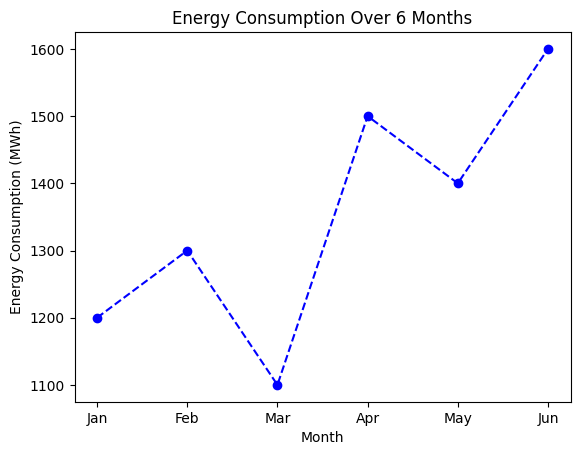

In [19]:
import matplotlib.pyplot as plt

#Sample data for energy consumption over 6 months (in Mich)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
energy_consumption= [1200, 1300, 1100, 1500, 1400, 1600]


#Create a Line plot
plt.plot(months, energy_consumption, marker='o', color='b', linestyle='--')

#Add titles and Labels
plt.title('Energy Consumption Over 6 Months')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (MWh)')
plt.show()

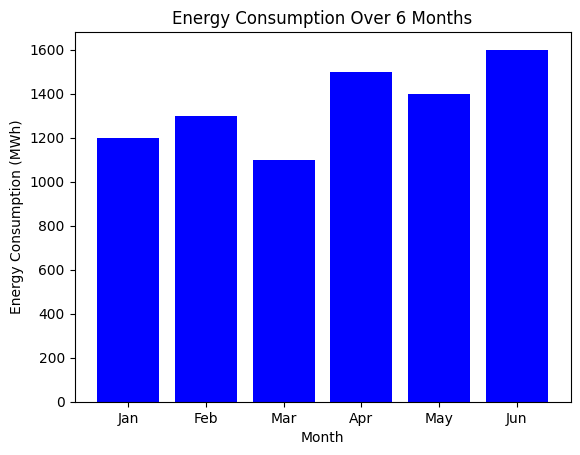

In [25]:
import matplotlib.pyplot as plt

# Sample data for energy consumption over 6 months (in MWh)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
energy_consumption = [1200, 1300, 1100, 1500, 1400, 1600]

# Create a bar chart
plt.bar(months, energy_consumption, color='b')

# Add titles and labels
plt.title('Energy Consumption Over 6 Months')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (MWh)')
plt.show()


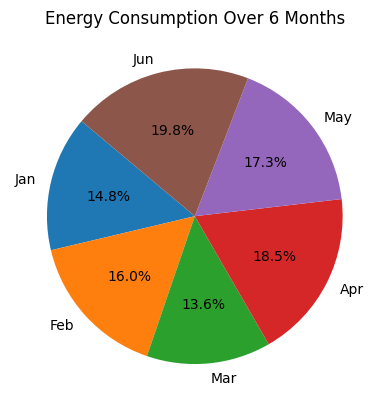

In [29]:
import matplotlib.pyplot as plt

# Sample data for energy consumption over 6 months (in MWh)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
energy_consumption = [1200, 1300, 1100, 1500, 1400, 1600]

# Create a pie chart
plt.pie(energy_consumption, labels=months, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Energy Consumption Over 6 Months')
plt.show()


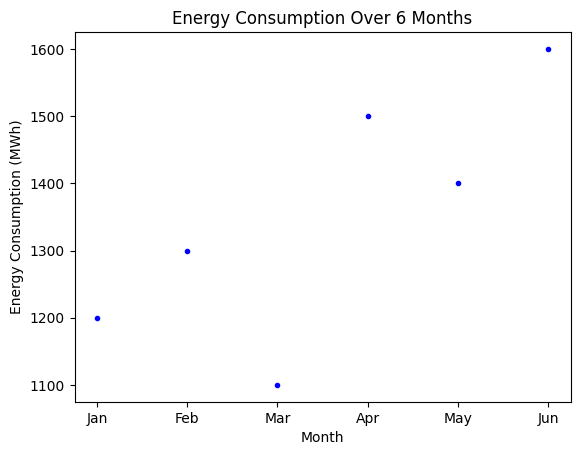

In [31]:
import matplotlib.pyplot as plt

# Sample data for energy consumption over 6 months (in MWh)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
energy_consumption = [1200, 1300, 1100, 1500, 1400, 1600]

# Create a scatter plot
plt.scatter(months, energy_consumption, color='b', marker='.')

# Add titles and labels
plt.title('Energy Consumption Over 6 Months')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (MWh)')
plt.show()


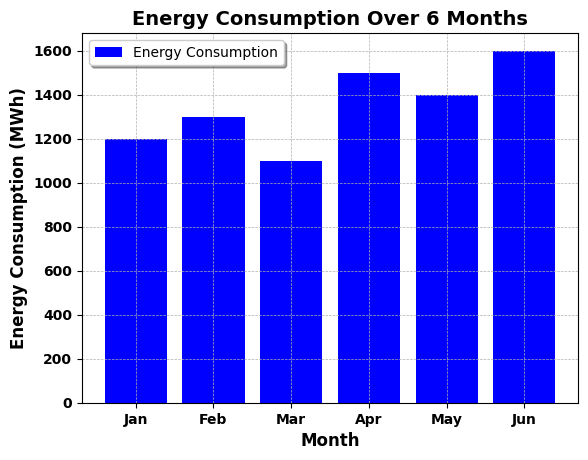

In [32]:
import matplotlib.pyplot as plt

# Sample data for energy consumption over 6 months (in MWh)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
energy_consumption = [1200, 1300, 1100, 1500, 1400, 1600]

# Create a bar chart
plt.bar(months, energy_consumption, color='b', label='Energy Consumption')

# Add titles and labels
plt.title('Energy Consumption Over 6 Months', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Energy Consumption (MWh)', fontsize=12, fontweight='bold')

# Add a legend
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True, fancybox=True)

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize tick parameters
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

# Show the plot
plt.show()


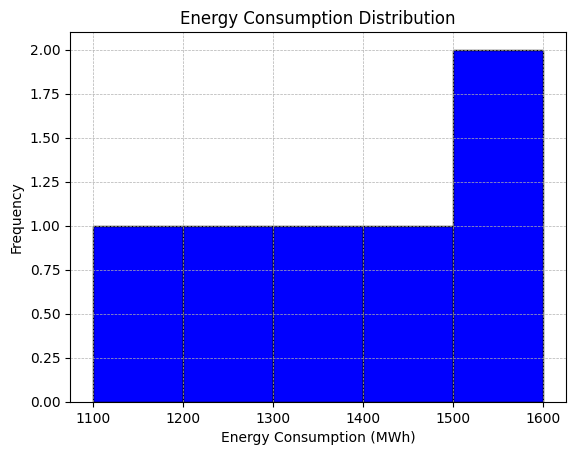

In [33]:
import matplotlib.pyplot as plt

# Sample data for energy consumption over 6 months (in MWh)
energy_consumption = [1200, 1300, 1100, 1500, 1400, 1600]

# Create a histogram
plt.hist(energy_consumption, bins=5, color='b', edgecolor='black')

# Add titles and labels
plt.title('Energy Consumption Distribution')
plt.xlabel('Energy Consumption (MWh)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()
